# Boston Crime Analysis
## Análise de informações geo-espaciais utilizando Folium


In [ ]:
# imports
import pandas as pd
import folium
import math
from folium.plugins import MarkerCluster,HeatMap
import seaborn as sns

In [ ]:
# import do dataset
df = pd.read_csv('https://raw.githubusercontent.com/rdrudi/PythonDataAnalysis/master/GeospatialAnalysis/BostonCrimeReportDataset473.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NUMERO       472 non-null    object 
 1   CODIGO       472 non-null    int64  
 2   GRUPO        472 non-null    object 
 3   DESCRICAO    472 non-null    object 
 4   BAIRRO       466 non-null    object 
 5   AREA         472 non-null    object 
 6   TIROS        0 non-null      float64
 7   DATA         472 non-null    object 
 8   ANO          472 non-null    int64  
 9   MES          472 non-null    int64  
 10  SEMANA       472 non-null    object 
 11  HORA         472 non-null    int64  
 12  UCR          472 non-null    object 
 13  RUA          468 non-null    object 
 14  LATITUDE     472 non-null    float64
 15  LONGITUDE    472 non-null    float64
 16  COORDENADAS  472 non-null    object 
 17  DTNOTIF      472 non-null    object 
 18  HRNOTIF      472 non-null    object 
dtypes: float

In [ ]:
df.head()

,NUMERO,CODIGO,GRUPO,DESCRICAO,BAIRRO,AREA,TIROS,DATA,ANO,MES,SEMANA,HORA,UCR,RUA,LATITUDE,LONGITUDE,COORDENADAS,DTNOTIF,HRNOTIF
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13,09:28:24
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12,20:11:26
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12,15:12:43
3,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)",2019-10-12,04:41:52
4,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)",2019-10-02,08:08:49


In [ ]:
# Generating the Base Map
# folium documentation: https://python-visualization.github.io/folium/
boston = (42.358443,-71.05977)
sp = (-23.557722,-46.556310)
local = boston
mapa = folium.Map(location=local,tiles='OpenStreetMap',zoom_start=12)
mapa

In [ ]:
# plotando os pontos onde houve crime
mc = MarkerCluster()
for i,reg in df.iterrows():
    lat = reg['LATITUDE']
    lon = reg['LONGITUDE']
    if not math.isnan(lat) and not math.isnan(lon):
        mc.add_child(folium.Marker([lat,lon],popup=reg['DATA'],tooltip=reg['DESCRICAO']))
mapa.add_child(mc)
mapa

In [ ]:
# excluindo os registos com coordenadas inválidas
df = df[df.LATITUDE != -1]

In [ ]:
# criando um heatmap dos crimes sobre o mapa original
mapa2 = folium.Map(location=local,tiles='Stamen Terrain',zoom_start=12)
dfh = df[['LATITUDE','LONGITUDE']].to_numpy(dtype='float64')
mapa2.add_child(HeatMap(data=dfh,radius=15))
# função para simplificar o código - plota um círculo ao invés de uma marker
def plotCrime(local):
    folium.CircleMarker(location=[local.LATITUDE,local.LONGITUDE],
                        radius=5,
                        weight=1,
                        popup=local.DATA,
                        tooltip=local.DESCRICAO,
                        color='#eb4034',
                        fill=True,
                        fill_color='#cf7872').add_to(mapa2)

df.apply(plotCrime,axis=1)
mapa2.fit_bounds(mapa2.get_bounds())
mapa2

In [ ]:
# agrupando crimes por tipo
import seaborn as sns
tipos = df.copy()  # duplica o df
tipos['QTDE'] = 1   # adiciona coluna QTDE com valor 1
tipos = tipos.groupby(['GRUPO']).count().reset_index()   # agrupa por grupo
tipos = tipos[['GRUPO','QTDE']]   # copia somente as colunas desejada
tipos

,GRUPO,QTDE
0,Aggravated Assault,17
1,Assembly or Gathering Violations,2
2,Auto Theft,10
3,Ballistics,3
4,Commercial Burglary,1
5,Confidence Games,4
6,Counterfeiting,1
7,Disorderly Conduct,6
8,Drug Violation,15
9,Fire Related Reports,3


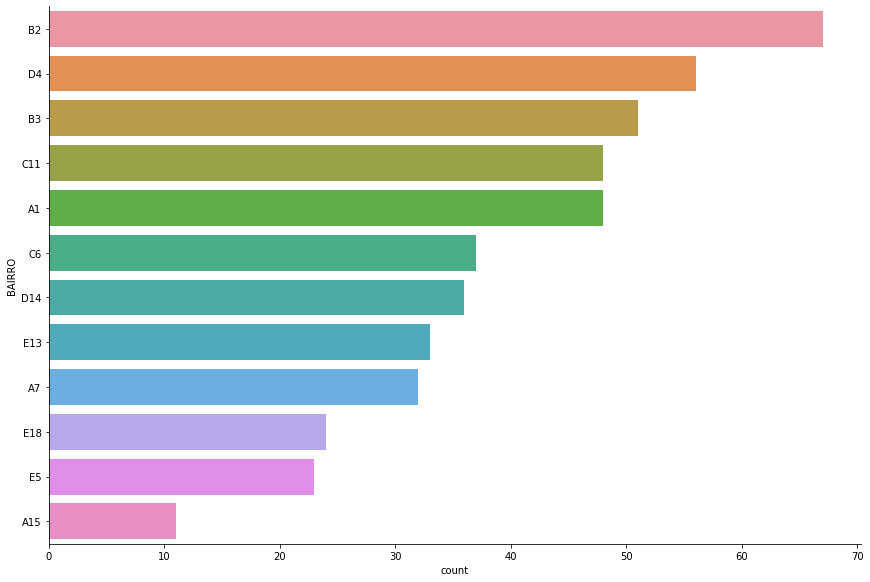

In [ ]:
# gráfico de barras de crimes por bairro
sns.catplot(y='BAIRRO',kind='count',height=8,aspect=1.5,order=df.BAIRRO.value_counts().index,data=df)

In [ ]:
# heatmap dos furtos
furto = df.loc[df.GRUPO == 'Larceny'][['LATITUDE','LONGITUDE','DESCRICAO']]
mapa3 = folium.Map(location=local,tiles='Stamen Toner',zoom_start=11)
furtoh = furto[['LATITUDE','LONGITUDE']].to_numpy(dtype='float64')
HeatMap(data=furtoh,radius=16).add_to(mapa3)
mapa3

In [ ]:
# heatmap de acidentes com veículos
mva = df.loc[df.GRUPO=='Motor Vehicle Accident Response'][['LATITUDE','LONGITUDE']]
mva.LATITUDE.fillna(0,inplace=True)
mva.LONGITUDE.fillna(0,inplace=True)
mvah = mva.to_numpy(dtype='float64')
mapa4 = folium.Map(location=local,tiles='Stamen Watercolor',zoom_start=11)
HeatMap(data=mvah,radius=16).add_to(mapa4)
mapa4